# Random Forest Classifier for Injection Molding of Bins using tsfresh data

In [ ]:
# For data exploration
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
# For displaying results
import seaborn as sn
import os

In [2]:
filename = 'extracted_features.csv'
data_path = os.getcwd() + "/Data/"
dataset_df = pd.read_csv(data_path + filename)

In [3]:
dataset_df.head()

,Unnamed: 0,ramposition__symmetry_looking__r_0.05,ramposition__number_cwt_peaks__n_1,ramposition__number_cwt_peaks__n_5,"ramposition__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)","ramposition__fft_coefficient__attr_""real""__coeff_26","ramposition__fft_coefficient__attr_""real""__coeff_27","ramposition__fft_coefficient__attr_""real""__coeff_28","ramposition__fft_coefficient__attr_""real""__coeff_34","ramposition__fft_coefficient__attr_""real""__coeff_56",...,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_1,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_2,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_3,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_4,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_5,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_6,sensor_pressure_time__ratio_beyond_r_sigma__r_1,sensor_pressure_time__ratio_beyond_r_sigma__r_1.5,sensor_pressure_time__lempel_ziv_complexity__bins_10,valid_or_not
0,0,1.0,17.0,13.0,0.023171,0.031487,0.036913,0.034420,0.031473,0.032431,...,0.000819,0.001554,0.002516,0.003723,0.005158,0.006760,0.149606,0.118110,0.251969,1
1,1,0.0,15.0,15.0,0.023184,0.033079,0.035980,0.033703,0.031803,0.032820,...,0.000840,0.001592,0.002587,0.003822,0.005301,0.006941,0.153846,0.123077,0.246154,1
2,2,0.0,16.0,16.0,0.023149,0.031477,0.035799,0.035498,0.031927,0.033760,...,0.000940,0.001764,0.002831,0.004164,0.005747,0.007492,0.152672,0.122137,0.244275,1
3,3,1.0,11.0,11.0,0.023208,0.033024,0.036715,0.032597,0.031617,0.033582,...,0.000867,0.001646,0.002668,0.003941,0.005464,0.007167,0.155039,0.116279,0.248062,1
4,4,1.0,18.0,15.0,0.023171,0.032825,0.035859,0.034547,0.031930,0.033091,...,0.000862,0.001634,0.002650,0.003914,0.005419,0.007110,0.147287,0.116279,0.248062,1


In [18]:
dataset_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
def check_imbalance(label: pd.Series) -> None:
    pv = np.count_nonzero(label) / len(label) * 100
    print(f"The imbalance profile has:\n {pv:.2f}% of valid products and \
        \n {100 - pv:.2f}% of invalid products")

In [6]:
print('For the full dataset,')
check_imbalance(dataset_df['valid_or_not'])

For the full dataset,
The imbalance profile has:
 70.04% of valid products and         
 29.96% of invalid products


## Random Forest Pilot Test
- We will perform quickly the random forest classifier to get an estimation of the initial f1 score for the minority class (invalid products)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset_df.drop(['valid_or_not'], axis=1),
    dataset_df['valid_or_not'],
    test_size=0.2)

In [8]:
print('For the training set,')
check_imbalance(y_train)
print('\nFor the test set,')
check_imbalance(y_test)

For the training set,
The imbalance profile has:
 69.51% of valid products and         
 30.49% of invalid products

For the test set,
The imbalance profile has:
 72.17% of valid products and         
 27.83% of invalid products


In [33]:
# Random Forest classificator evaluator function
def rfc_train_evaluator(model_rfc, Xtrain, ytrain, Xtest, ytest) -> tuple:
    model_rfc.fit(Xtrain, ytrain)
    mean_accuracy = model_rfc.score(Xtest, ytest) * 100
    y_predicted = model_rfc.predict(Xtest)
    return (mean_accuracy, y_predicted)

In [34]:
pilot_model_rfc = RandomForestClassifier()

In [35]:
pilot_model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
pilot_accuracy, pilot_predictions = rfc_train_evaluator(pilot_model_rfc, X_train, y_train, X_test, y_test)
cm = confusion_matrix(y_test, pilot_predictions)

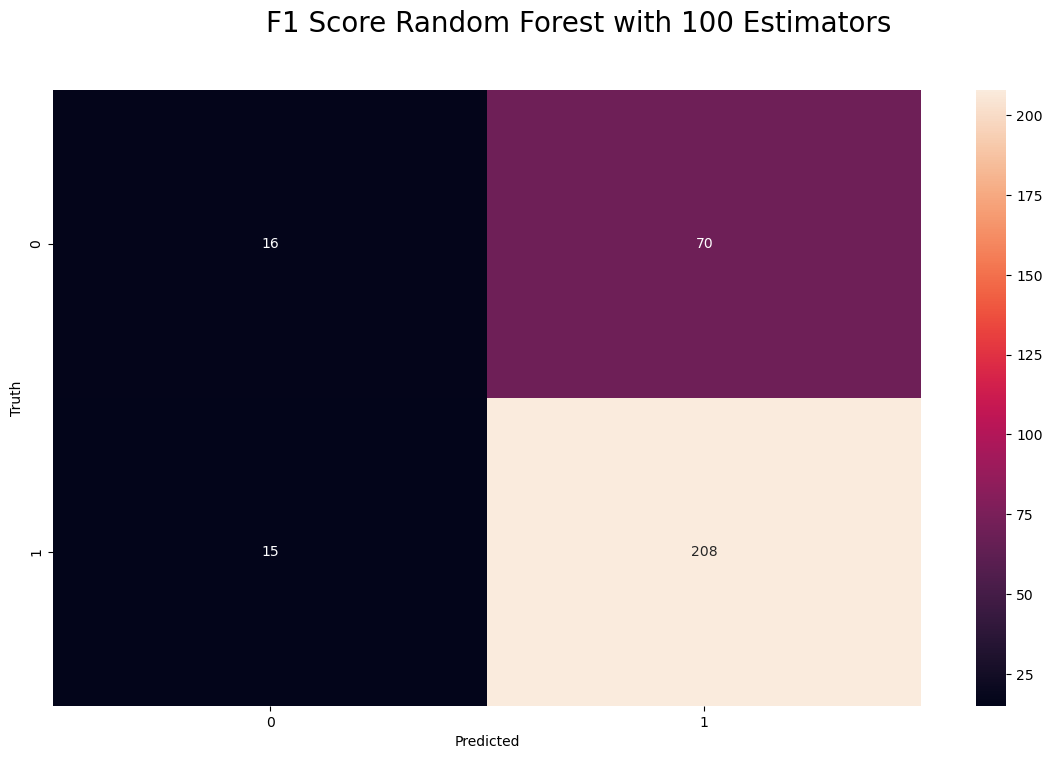

In [37]:
fig_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
fig_rfc.suptitle("F1 Score Random Forest with 100 Estimators", fontsize=fs)
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [38]:
f1_scores = f1_score(y_test, pilot_predictions, average=None)
print(f"The f1 scores for the not valid and valid classes are respectively {f1_scores[0]:.2f} and {f1_scores[1]:.2f}")

The f1 scores for the not valid and valid classes are respectively 0.27 and 0.83


SMOTE- We can see that the minority class has low f1-score
## Oversampling the minority class using SMOTE
- We will SMOTE from the imbalance-learn library which use knn to generated new datapoints for the minority class

In [39]:
X = dataset_df.drop('valid_or_not',axis='columns')
y = dataset_df['valid_or_not']

In [40]:
X.head()

,ramposition__symmetry_looking__r_0.05,ramposition__number_cwt_peaks__n_1,ramposition__number_cwt_peaks__n_5,"ramposition__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)","ramposition__fft_coefficient__attr_""real""__coeff_26","ramposition__fft_coefficient__attr_""real""__coeff_27","ramposition__fft_coefficient__attr_""real""__coeff_28","ramposition__fft_coefficient__attr_""real""__coeff_34","ramposition__fft_coefficient__attr_""real""__coeff_56","ramposition__fft_coefficient__attr_""imag""__coeff_46",...,"sensor_pressure_time__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""min""",sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_1,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_2,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_3,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_4,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_5,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_6,sensor_pressure_time__ratio_beyond_r_sigma__r_1,sensor_pressure_time__ratio_beyond_r_sigma__r_1.5,sensor_pressure_time__lempel_ziv_complexity__bins_10
0,1.0,17.0,13.0,0.023171,0.031487,0.036913,0.034420,0.031473,0.032431,-0.032198,...,0.098394,0.000819,0.001554,0.002516,0.003723,0.005158,0.006760,0.149606,0.118110,0.251969
1,0.0,15.0,15.0,0.023184,0.033079,0.035980,0.033703,0.031803,0.032820,-0.030895,...,0.091011,0.000840,0.001592,0.002587,0.003822,0.005301,0.006941,0.153846,0.123077,0.246154
2,0.0,16.0,16.0,0.023149,0.031477,0.035799,0.035498,0.031927,0.033760,-0.031910,...,0.107187,0.000940,0.001764,0.002831,0.004164,0.005747,0.007492,0.152672,0.122137,0.244275
3,1.0,11.0,11.0,0.023208,0.033024,0.036715,0.032597,0.031617,0.033582,-0.030984,...,0.094567,0.000867,0.001646,0.002668,0.003941,0.005464,0.007167,0.155039,0.116279,0.248062
4,1.0,18.0,15.0,0.023171,0.032825,0.035859,0.034547,0.031930,0.033091,-0.032218,...,0.091098,0.000862,0.001634,0.002650,0.003914,0.005419,0.007110,0.147287,0.116279,0.248062


In [41]:
y.value_counts()

1    1080
0     462
Name: valid_or_not, dtype: int64

In [42]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    1080
0    1080
Name: valid_or_not, dtype: int64

In [43]:
X_rtrain, X_rtest, y_rtrain, y_rtest = train_test_split(X_sm, y_sm, test_size=0.2)

In [44]:
print(y_rtrain.value_counts())
print(y_rtest.value_counts())

0    881
1    847
Name: valid_or_not, dtype: int64
1    233
0    199
Name: valid_or_not, dtype: int64


In [46]:
r_pilot_accuracy, r_pilot_predictions = rfc_train_evaluator(pilot_model_rfc, X_rtrain, y_rtrain, X_rtest, y_rtest)
rcm = confusion_matrix(y_rtest, r_pilot_predictions)

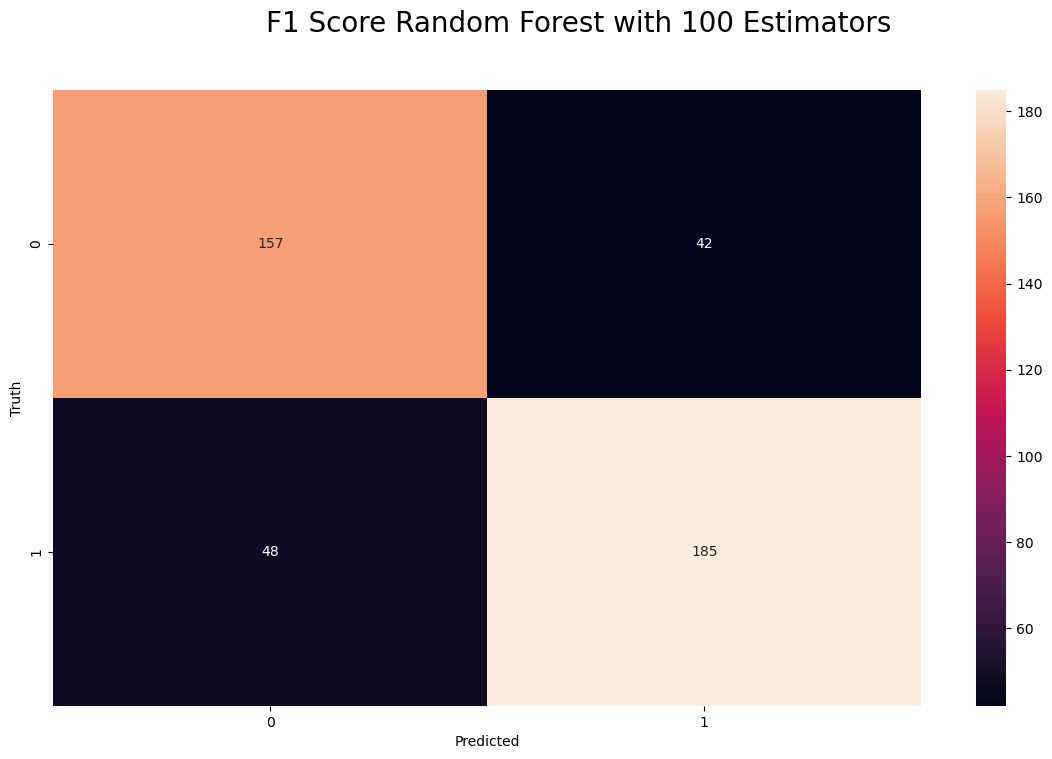

In [47]:
fig_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
fig_rfc.suptitle("F1 Score Random Forest with 100 Estimators", fontsize=fs)
sn.heatmap(rcm, annot=True, fmt="")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [50]:
f1_rscores = f1_score(y_rtest, r_pilot_predictions, average=None)
print(f"The f1 scores for the not valid and valid classes are respectively {f1_rscores[0]:.2f} and {f1_rscores[1]:.2f}")

The f1 scores for the not valid and valid classes are respectively 0.78 and 0.80


## Conclusions
- The smote oversampling technique allows to improve the minority class f1 score up to 78%.
- The SMOTE is based on knn and can help to produce new synthetic data by means of oversampling the minority class.

## TODO
- Explore resampling technique besides **sample_strategy**=`minority`, to `all` (undersampling and oversampling)
- Perform a research grid for the parameter tunning of the Random Forest Algorithm
- Change p-value and determine a better minimum p-value that avoids overfitting
- Explore other ML algorithms besides random forest